# Выбор модели для задачи предсказания оттока клиентов

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date,datetime
from collections import Counter
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [3]:
def auto(axis):
    for i in axis.patches:
           axis.text(i.get_x() + i.get_width() / 2, i.get_height() + 5, i.get_height(),ha='center', va='bottom')

bank = pd.read_csv('./BankChurners.csv') 
bank = bank.drop(bank.columns[21:23],axis=1)
bank = bank.drop(bank.columns[0],axis=1)
bank.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Проверка N/a данных

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int64
Total_Trans_Ct              10127 non-null int

# Визуализация данных

# Процент мужчин и женщин

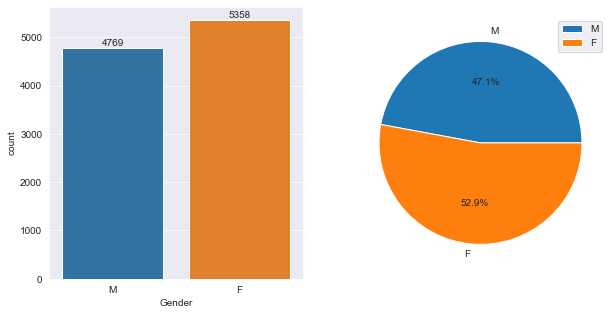

In [5]:
fig , a = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Gender',data=bank,ax=a[0])
auto(a[0])
a[1].pie(bank.Gender.value_counts().sort_values(),labels=bank.Gender.value_counts().sort_values().index,autopct='%1.1f%%')
a[1].legend()

# Статистика оттока клиентов

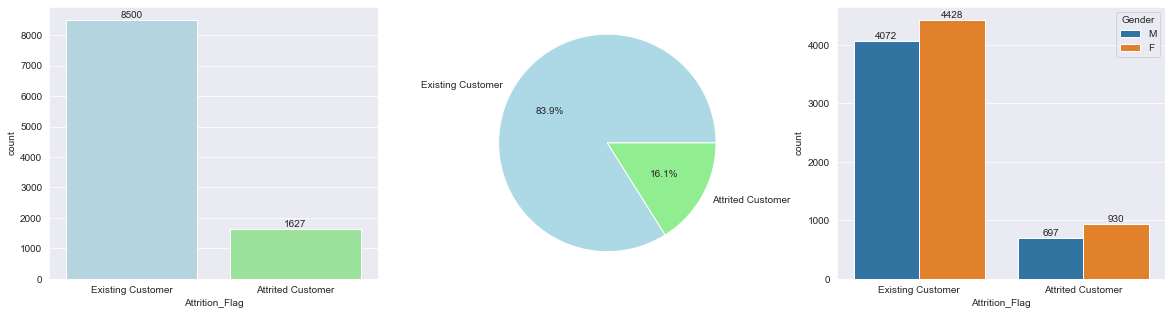

In [6]:
fig1 , a1 = plt.subplots(1,3,figsize=(20,5))
sns.countplot(x='Attrition_Flag',data=bank,ax=a1[0],palette=['lightblue','lightgreen'])
auto(a1[0])
a1[1].pie(bank.Attrition_Flag.value_counts(),labels=bank.Attrition_Flag.value_counts().index,autopct='%1.1f%%',colors=['lightblue','lightgreen'])
sns.countplot(x='Attrition_Flag',hue='Gender',data=bank,ax=a1[2])
auto(a1[2])

# Возраст клиентов

<AxesSubplot:xlabel='Gender', ylabel='Customer_Age'>

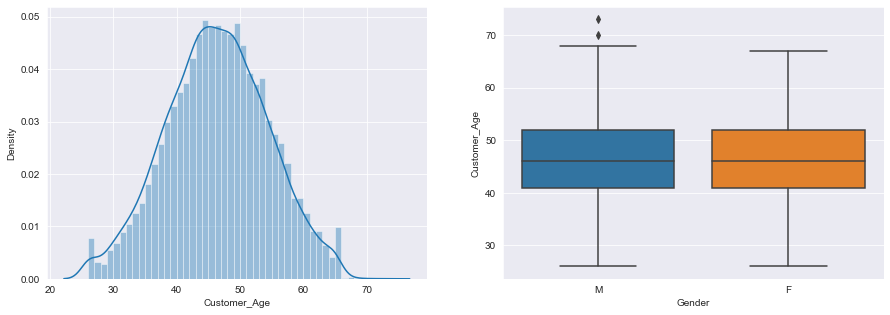

In [8]:
fig2 , a2 = plt.subplots(1,2,figsize=(15,5))
sns.distplot(bank['Customer_Age'] ,ax=a2[0] ,kde=True)
sns.boxplot(y='Customer_Age',x='Gender',data=bank,ax=a2[1])

# Уровень образования клиентов

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

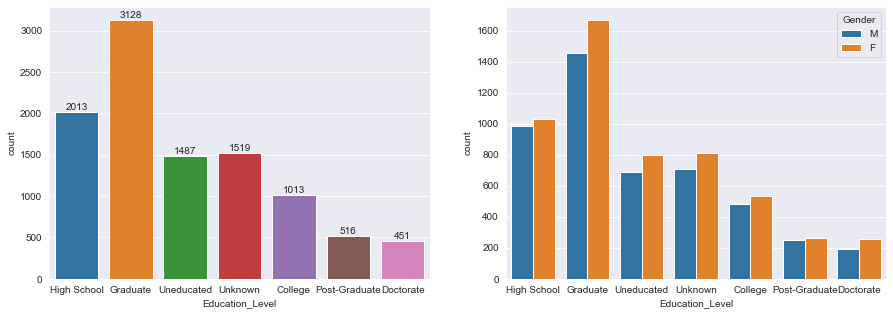

In [9]:
fig4 , a4 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Education_Level',data=bank,ax=a4[0])
auto(a4[0])
sns.countplot(x='Education_Level',hue='Gender',data=bank,ax=a4[1])

# Семейное положение

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

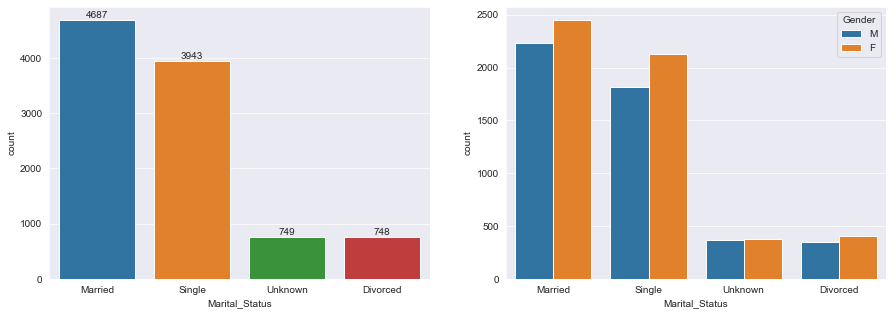

In [10]:
fig5 , a5 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Marital_Status',data=bank,ax=a5[0])
auto(a5[0])
sns.countplot(x='Marital_Status',hue='Gender',data=bank,ax=a5[1])

# Доход клиентов

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

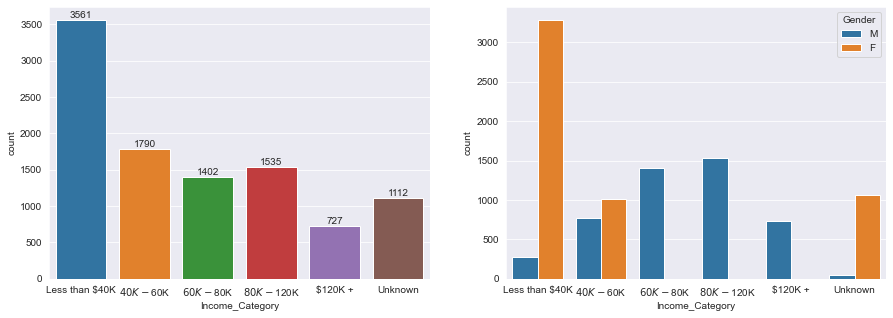

In [11]:
income_order=['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown']
fig6 , a6 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Income_Category',data=bank,ax=a6[0],order=income_order)
auto(a6[0])
sns.countplot(x='Income_Category',hue='Gender',data=bank,ax=a6[1],order=income_order)

# Категория карты

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

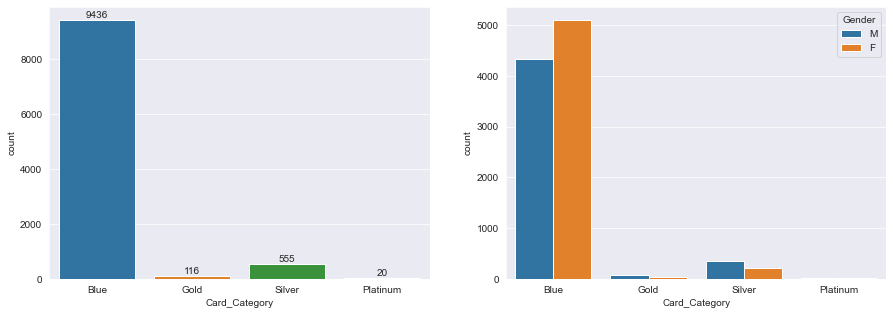

In [12]:
fig7 , a7 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Card_Category',data=bank,ax=a7[0])
auto(a7[0])
sns.countplot(x='Card_Category',hue='Gender',data=bank,ax=a7[1])

# Переход к числовым значениям

In [13]:
col= ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
data1=pd.DataFrame(pd.get_dummies(bank.Attrition_Flag)['Attrited Customer'])
data2=pd.get_dummies(bank,columns=col,drop_first=True).drop('Attrition_Flag',axis=1)
data=pd.concat([data1,data2],axis=1)
data.head()

,Attrited Customer,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,1,0,0,0,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,1,0,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,1,0,0,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,0,1,0,0,0,1,0,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,1,0,0,0,0,0,0


# Прверка корреляции для определения признака для предсказательной модели

<AxesSubplot:>

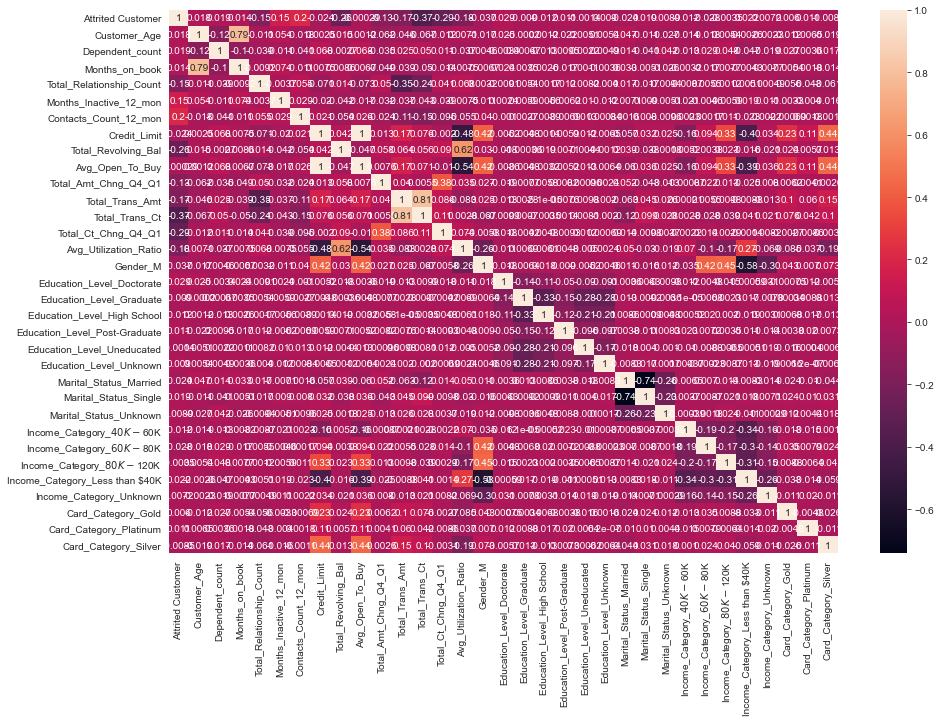

In [14]:
corr=data.corr()
a8 = plt.figure(figsize = (15,10))
sns.heatmap(corr,annot=True)

In [15]:
col_use=corr.iloc[:,0][abs(corr.iloc[:,0]) > 0.1].index
Use=data[col_use]
Use.head(3)

,Attrited Customer,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,5,1,3,777,1.335,1144,42,1.625,0.061
1,0,6,1,2,864,1.541,1291,33,3.714,0.105
2,0,4,1,0,0,2.594,1887,20,2.333,0.000


<AxesSubplot:>

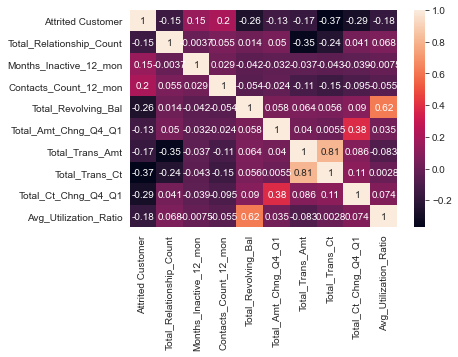

In [16]:
sns.heatmap(Use.corr(),annot=True)

# Построение предсказательной модели

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
SEED = 1

Разделение данные на тренировочные и тестовые в соотношении 70% к 30%

In [21]:
X_train, X_test, y_train, y_test = train_test_split(Use.iloc[:,1:10], Use.iloc[:,0],test_size= 0.3,random_state= SEED)

Создание классификаторов

In [24]:
lr = LogisticRegression(random_state=SEED)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=SEED)
vc = VotingClassifier(estimators=classifiers)
classifiers = [('Logistic Regression', lr),('K Nearest Neighbours', knn),('Classification Tree', dt), ('Voting Classifier', vc)]

# Подсчет accuracy для моделей

In [25]:
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:.3f}'.format(name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.888
K Nearest Neighbours : 0.899
Classification Tree : 0.936
Voting Classifier : 0.932


Таким образом, наилучший результат на данной задаче показали Classification Tree и Voting Classifier